Import libraries

In [ ]:
!pip install dash
!pip install jupyter-dash

In [ ]:
from scipy import stats # pip install scipy
from sklearn.model_selection import train_test_split # pip install sklearn
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from jupyter_dash import JupyterDash  # pip install jupyter-dash
from dash import html, dcc # pip install dash
from dash.dependencies import Output, Input, State
from dash.exceptions import PreventUpdate
import matplotlib.pyplot as plt
import seaborn as sns
import asyncio
import numpy as np # pip install numpy
import pandas as pd # pip install pandas
import plotly.express as px
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
import matplotlib
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load dataset 'HousingData.csv'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cs4630/HousingData.csv')
len(df)

506

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:

- CRIM,     per capita crime rate by town

- ZN,       proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS,    proportion of non-retail business acres per town

- CHAS,     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

- NOX,      nitric oxides concentration (parts per 10 million)

- RM,       average number of rooms per dwelling

- AGE,      proportion of owner-occupied units built prior to 1940

- DIS,      weighted distances to five Boston employment centres

- RAD,      index of accessibility to radial highways

- TAX,      full-value property-tax rate per $10,000

- PTRATIO,  pupil-teacher ratio by town

- B,        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- LSTAT,    % lower status of the population

- MEDV,     Median value of owner-occupied homes in $1000's


### Preprocessing

Check for missing values

In [ ]:
df[df.isna().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,NaN,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,NaN,29.8
479,14.33370,0.0,18.10,NaN,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
482,5.73116,0.0,18.10,NaN,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01,25.0
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4


Check for missing value percentage for each column

In [ ]:
df.isnull().sum()/len(df)

CRIM       0.039526
ZN         0.039526
INDUS      0.039526
CHAS       0.039526
NOX        0.000000
RM         0.000000
AGE        0.039526
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      0.039526
MEDV       0.000000
dtype: float64

Fill with mean for each missing value

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
df[df.isna().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


Using Z-score to remove outliers

In [ ]:
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]
df.shape

(403, 14)

In [ ]:
x = df.loc[:,'CRIM':'LSTAT']
y = df['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42 )

In [ ]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
75,0.095120,0.0,12.83,0.0,0.437,6.286,45.0,4.5026,5,398,18.7,383.23,8.94
335,0.039610,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5,224,20.2,396.90,8.01
337,0.030410,0.0,5.19,0.0,0.515,5.895,59.6,5.6150,5,224,20.2,394.81,10.56
33,1.151720,0.0,8.14,0.0,0.538,5.701,95.0,3.7872,4,307,21.0,358.77,18.35
42,0.141500,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3,233,17.9,383.37,5.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.171420,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
95,0.122040,0.0,2.89,0.0,0.445,6.625,57.8,3.4952,2,276,18.0,357.98,6.65
302,3.611874,34.0,6.09,0.0,0.433,6.495,18.4,5.4917,7,329,16.1,383.61,8.67
428,7.367110,0.0,18.10,0.0,0.679,6.193,78.1,1.9356,24,666,20.2,96.73,21.52


### Modeling

#### Linear regression

In [ ]:
linRegr = LinearRegression()
linRegr.fit(x_train, y_train)
y_pred = linRegr.predict(x_test)

print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root mean squared error: %.2f" % mean_squared_error(y_test, y_pred, squared=False))

Mean absolute error: 2.97
Mean squared error: 23.30
Root mean squared error: 4.83


In [ ]:
# R-sqaured refers to the determination of coefficient.How well unknown sample will be determined by the model.
r2_score = linRegr.score(x_test, y_test)
print(r2_score*100, '%')

63.528583386415406 %


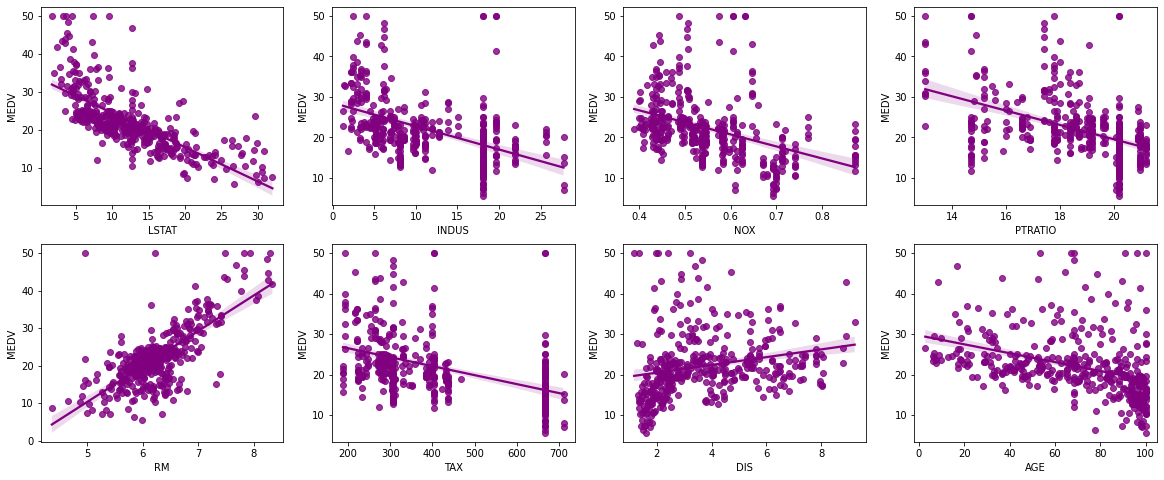

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,8))
cols = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
for col, ax in zip(cols, axs.flat):
    sns.regplot(x = df[col] ,y=df['MEDV'] , color = 'purple', ax=ax)

In [ ]:
corr = df.corr()
corr.shape

(14, 14)

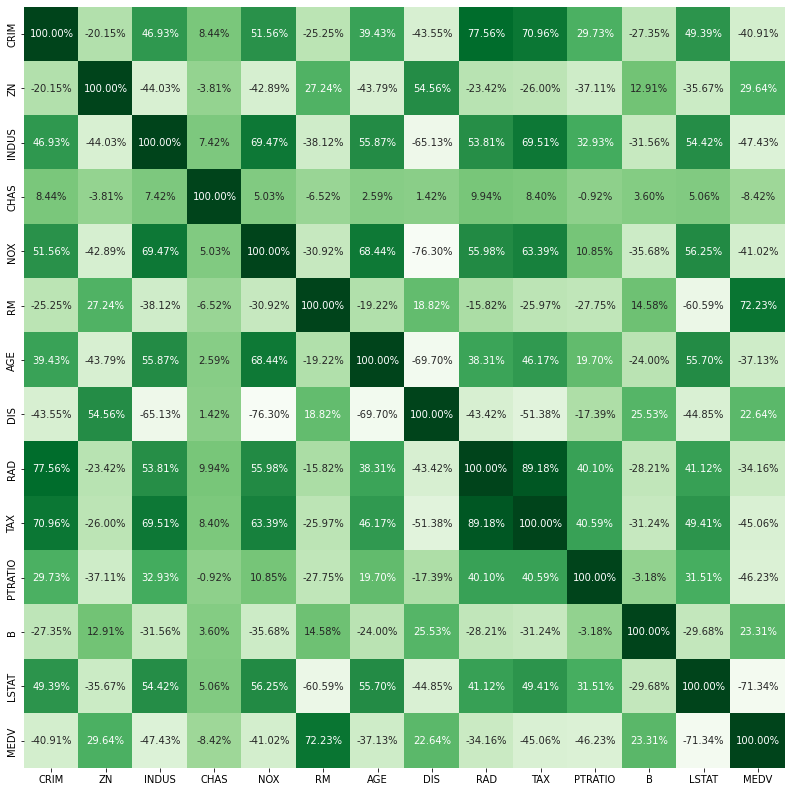

In [ ]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


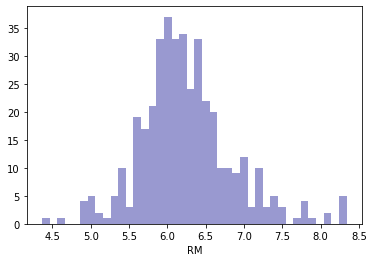

In [ ]:
#number of rooms into the house
sns.distplot(df['RM'].dropna(),kde=False,color='darkblue',bins=40)

#### SVM

##### Tuning parameters

In [ ]:
scaler = StandardScaler()
x_stand = scaler.fit_transform(x)
x_strain, x_stest, y_train, y_test = train_test_split(x_stand, y, test_size=0.2, random_state=42 )

In [ ]:
svmLinear = SVR()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'epsilon':[3,4,5,6,7],
              'kernel':['linear','poly','rbf','sigmoid']}
grid = GridSearchCV(SVR(), param_grid=param_grid, refit = True, verbose = 3, cv=cv, n_jobs=-1)
resultsEnm = grid.fit(x_strain, y_train)

In [ ]:
resultsEnm.best_params_

##### Modeling

In [ ]:
svmLinear = SVR(kernel = 'rbf',C=100,epsilon=3, gamma = 0.01)
svmLinear.fit(x_strain,y_train)
y_pred = svmLinear.predict(x_stest)

print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root mean squared error: %.2f" % mean_squared_error(y_test, y_pred, squared=False))

Mean absolute error: 2.48
Mean squared error: 19.16
Root mean squared error: 4.38


In [ ]:
print("Accuracy: %.2f" % svmLinear.score(x_stest, y_test))

Accuracy: 0.70


#### Random Forest

##### Tuning parameters

In [ ]:
param_grid = {
    'n_estimators':[10,20,30],
    'bootstrap': [True],
    'max_depth': [2,3,4,5,6],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [4, 6, 8]
}
grid = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, verbose = 3, cv=cv, n_jobs=-1)
resultsEnm = grid.fit(x_train, y_train)

In [ ]:
resultsEnm.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 30}

##### Modeling

In [ ]:
ranFor = RandomForestRegressor(bootstrap=True,max_depth=6,max_features='auto',min_samples_leaf= 3,min_samples_split=6,n_estimators=30)
ranFor.fit(x_train, y_train)
y_pred = ranFor.predict(x_test)

print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root mean squared error: %.2f" % mean_squared_error(y_test, y_pred, squared=False))

Mean absolute error: 2.50
Mean squared error: 18.85
Root mean squared error: 4.34


In [ ]:
print("Accuracy: %.2f" % ranFor.score(x_test, y_test))

Accuracy: 0.70


#### Polynomial Regression

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

In [ ]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = poly_reg_model.predict(X_test)
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root mean squared error: %.2f" % mean_squared_error(y_test, y_pred, squared=False))

Mean absolute error: 2.39
Mean squared error: 15.24
Root mean squared error: 3.90


#### Elastic Net Model

##### Tuning parameters

In [ ]:
model = ElasticNet()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)
searchEnm = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
resultsEnm = searchEnm.fit(x_train, y_train)

In [ ]:
resultsEnm.best_params_

In [ ]:
y_pred = resultsEnm.predict(x_test)
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root mean squared error: %.2f" % mean_squared_error(y_test, y_pred, squared=False))

Mean absolute error: 2.46
Mean squared error: 18.98
Root mean squared error: 4.36


#### k-nearest Neighbors Regression

In [ ]:
neigh = KNeighborsRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['n_neighbors'] = [4,5,6,7,8,9,10]
grid['weights'] = ['uniform', 'distance']
grid['algorithm'] = ['auto','ball_tree', 'kd_tree', 'brute']
searchKnr = GridSearchCV(neigh, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
resultsKnr = searchKnr.fit(x_train, y_train)

In [ ]:
y_pred = resultsKnr.predict(x_test)
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root mean squared error: %.2f" % mean_squared_error(y_test, y_pred, squared=False))

Mean absolute error: 3.95
Mean squared error: 37.94
Root mean squared error: 6.16


### Dynamic Dashboard

In [ ]:
app = JupyterDash(__name__)

# Create page header
def header():
	markUp = html.Section(
			[
				html.H1('The Boston House Market'),
				html.Div(
						[
							html.H2('Authors'),
							html.P('Jingyi Su, Lijing Zhu, Nathaniel Robles, and Pramiti Barua.')	
						]
				)
			]
	)
	return markUp

# Create figures and graphs
def figuresAndGraphs():
	figOne = px.bar(df, x="ZN", y="MEDV", color="CHAS", barmode="group")
	markUp = html.Div(
			[
				html.H2('Figures and Graphs'),
				dcc.Graph( id='example-graph', figure=figOne)
			]
	)
	return markUp

# House value prediction calculator
def modelInputs():
	markUp = html.Section(
			[
				# Create headings
				html.H2('House Value Predictor'),
				html.H3('Model Inputs'),
				# Create form questions
				html.Div(
						[
							html.Label('Per Capita Crime Rate By Town  ', htmlFor='crim'),
							dcc.Input(id="crim", type="number", name='crim', placeholder='CRIM', required='required'),
						]
				),
				html.Br(),
				html.Div(
						[
							html.Label('Proportion Of Residential Land Zoned For Lots Over 25,000 sq.ft.  ', htmlFor='zn'),
							dcc.Input(id="zn", type="number", name='zn', placeholder='ZN', required='required'),
						]
				),
				html.Br(),
				html.Div(
						[
							html.Label('Proportion Of Non-Retail Business Acres Per Town  ', htmlFor='indus'),
							dcc.Input(id="indus", type="number", name='indus', placeholder='INDUS', required='required'),
						]
				),
				html.Br(),
				html.Div(
						[
							html.Label('Charles River Dummy Variable	', htmlFor='chas'),
							dcc.Input(id="chas", type="number", name='chas', placeholder='CHAS', required='required'),
						]
				),
				html.Br(),
				html.Div(
						[
							html.Label('Nitrix Oxide Concentrations (parts per 10 mil.)	', htmlFor='nox'),
							dcc.Input(id="nox", type="number", name='nox', placeholder='NOX', required='required'),
						]
				),
				html.Br(),
				html.Div(
						[
							html.Label('Average Number Of Rooms Per Dwelling  ', htmlFor='rm'),
							dcc.Input(id="rm", type="number", name='rm', placeholder='RM', required='required'),
						]
				),
				html.Br(),
				html.Div(
						[
							html.Label('Proportion Of Owner-Occupied Units Built Prior To 1940  ', htmlFor='age'),
							dcc.Input(id="age", type="number", name='age', placeholder='AGE', required='required'),
						]
				),
				html.Br(),
				html.Div(
						[
							html.Label('Weighted Distances to Five Boston Employment Centres  ', htmlFor='dis'),
							dcc.Input(id="dis", type="number", name='dis', placeholder='DIS', required='required'),
						]
				),
				html.Br(),
				html.Div(
						[
							html.Label('Index Of Accessibility To Radial Highways  ', htmlFor='rad'),
							dcc.Input(id="rad", type="number", name='rad', placeholder='RAD', required='required'),
						]
				),
				html.Br(),
				html.Div(
						[
							html.Label('Full-Value Property-Tax Rate Per $10,000  ', htmlFor='tax'),
							dcc.Input(id="tax", type="number", name='tax', placeholder='TAX', required='required'),
						]
				),
				html.Br(),
				html.Div(
						[
							html.Label('Pupil-Teacher Ratio By Town  ', htmlFor='ptratio'),
							dcc.Input(id="ptratio", type="number", name='ptratio', placeholder='PTRATIO', required='required'),
						]
				),
				html.Br(),
				html.Div(
						[
							html.Label('Proportion Of Blacks By Town  ', htmlFor='bk'),
							dcc.Input(id="bk", type="number", name='bk', placeholder='BK', required='required'),
						]
				),
				html.Br(),
				html.Div(
						[
							html.Label('Percentage Of Lower Status Population  ', htmlFor='lstat'),
							dcc.Input(id="lstat", type="number", name='lstat', placeholder='LSTAT', required='required'),
						]
				),
				# Submit Button
				html.Button('Submit', id='submit-val', n_clicks=0),
			] # Direct callback output
			+ [html.Div(id='modelOutput')]
	)
	return markUp

# Callback function that hides form output until values are submitted
@app.callback(
		Output('modelOutput', 'style'),
		Input('submit-val', 'n_clicks'),
)
def hideOutput(n_clicks):
	if not n_clicks > 0:
		return {'display':'none'}
	else:
		return {'display':'inline'}

# Callback function that returns html output and calculations from form input
@app.callback(
		Output('modelOutput', 'children'),
		Input('submit-val', 'n_clicks'),
		State('crim', 'value'),
		State('zn', 'value'),
		State("indus", "value"),
		State("chas", "value"),
		State("nox", "value"),
		State("rm", "value"),
		State("age", "value"),
		State("dis", "value"),
		State("rad", "value"),
		State("tax", "value"),
		State("ptratio", "value"),
		State("bk", "value"),
		State("lstat", "value"),
)
def modelInputsHandler(n_clicks, _crim, _zn, _indus, _chas, _nox, _rm, _age, _dis, _rad, _tax, _ptratio, _bk, _lstat):
	if n_clicks > 0:
		# Create form object
		formData = {
			'CRIM': [float(_crim)],
			'ZN': [float(_zn)],
			'INDUS': [float(_indus)],
			'CHAS': [float(_chas)],
			'NOX': [float(_nox)],
			'RM': [float(_rm)],
			'AGE': [float(_age)],
			'DIS': [float(_dis)],
			'RAD': [float(_rad)],
			'TAX': [float(_tax)],
			'PTRATIO': [float(_ptratio)],
			'B': [float(_bk)],
			'LSTAT': [float(_lstat)]
		}
		# Boundary check for missing form input
		hasNoneValue = []
		# Check each property for a missing value
		for f in formData:
			if f[0] is None:
				hasNoneValue.append(False) # Append False to list if missing value is found
			else:
				hasNoneValue.append(True) # Append True to list if value is not missing
		if False in hasNoneValue:
			return html.Div(style={'display':'none'}) # Hide output if there are missing values
		else:
			# Display output when form is valid
			return html.Div(
					[
						html.P('CRIM: {} | ZN: {} | INDUS: {} | CHAS: {} | NAX: {} | RM: {} | AGE: {} | DIS: {} | RAD: {} | TAX: {} | PTRATIO: {} | BK: {} | LSTAT: {}'.format(_crim, _zn, _indus, _chas, _nox, _rm, _age, _dis, _rad, _tax, _ptratio, _bk, _lstat)),
						html.H3('Value Predictions for This Home'),
						html.P('Linear Regression Prediction: ${}'.format(round(linRegr.predict(pd.DataFrame(formData))[0]*1000, 4))),
						html.P('SVM Prediction: ${}'.format(round(svmLinear.predict(pd.DataFrame(formData))[0]*1000, 4))),
						html.P('Random Forest Prediction: ${}'.format(round(ranFor.predict(pd.DataFrame(formData))[0]*1000, 4))),
					]
			)

app.layout = html.Div(
		[
			header(),
			figuresAndGraphs(),
			modelInputs()
		]
)

if __name__ == '__main__':
	app.run_server(debug=True)

Dash app running on:


<IPython.core.display.Javascript object>